## 1. О теорме Байеса

**1.1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.**

Прокурор оценил вероятность того, что подозреваемый виновен следующим образом:

$
\begin{align}
P(подозреваемый=виновен|кровь=редкая) = 1 - P(кровь=редкая|подозреваемый=невиновен)
\end{align}
$

Правильно оценить такую вероятность можно так:

$
\begin{align}
P(подозреваемый=виновен|кровь=редкая) = 
\frac{P(кровь=редкая|подозреваемый=виновен) \cdot P(подозреваемый=виновен)}{P(кровь=редкая)}
\end{align}
$

Из условия известно,что $P(кровь=редкая|подозреваемый=виновен) = 1, P(кровь=редкая)=0.01$

Получим:

$
\begin{align}
P(подозреваемый=виновен|кровь=редкая) = 
\frac{P(подозреваемый=виновен)}{0.01}
\end{align}
$

Здесь P(подозреваемый=виновен) - априорная вероятность, что подозреваемый виновен.

**1.2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?**

Адвокат стал искать ту же вероятность, что и прокурор и вычислил, что подсудимый виновен (при условии, что кровь редкая) подставив вместо P(подозреваемый=виновен) величину $\frac{1}{общее \ число \ жителей}$:

$
\begin{align}
P(подозреваемый=виновен|кровь=редкая) = \frac{1}{P(кровь=редкая) \cdot общее \ число \ жителей}
\end{align}
$

$\frac

**1.3 Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?**

Рассмотрим выражения для определения вероятности, что пациент действительно болен при наличии положительного теста.

$
\begin{align}
P(болен|положительный) = \frac{P(положительный|болен) \cdot P(болен)}{P(положительный)} = \newline
= \frac{P(положительный|болен) \cdot P(болен)}
{P(болен)\cdot P(положительный|болен) + P(здоров) \cdot P(положительный|здоров)} = \newline
= \frac{P_{TruePositive} \cdot 0.05}{0.05 \cdot P_{TruePositive} + 0.95\cdot P_{FalsePositive}} = \newline
= \frac{1}{1 + \frac{0.95}{0.05} \cdot \frac{P_{\bf FalsePositive}}{P_{TruePositive}}}
\end{align}
$

Изначатьно у нас:
$P_{TruePositive} = 0.95 \newline P_{FalsePositive} = 0.05 $

Заметим, что $P_{FalsePositive}$ значительно влияет на результаты теста.
Построим график зависимости показаний теста от вероятности ложноположительной ошибки.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def p_sick_and_positive(p_false_positive):
    return 1./(1. + 0.95/0.05 * p_false_positive / 0.95)

In [78]:
# 1. Sick and Positive plot
p_false_positive = np.linspace(1e-5, 0.05)
y = p_sick_and_positive(p_false_positive) * 100

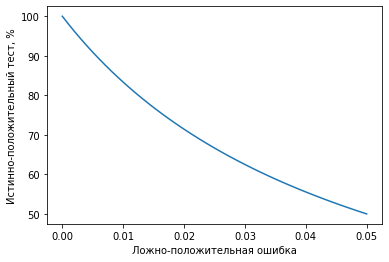

In [79]:
plt.plot(p_false_positive, y)
plt.ylabel("Истинно-положительный тест, %")
plt.xlabel("Ложно-положительная ошибка")
plt.show()

Аналогично можно посчитать вероятнось отрицательного теста при больном пациенте:
$
\begin{align}
P(болен|отрицательный) =
\frac{1}{1 + \frac{P(здоров)}{P_(болен)} \cdot \frac{P(отрицательный|здоров)}{P(отрицательный|болен)}}= \newline 
\frac{1}{1 + \frac{0.95}{0.05} \cdot \frac{P_{TrueNegative}}{\bf P_{FalseNegative}}}= \newline 
\end{align}
$


In [80]:
def p_sick_and_negative(p_false_negative):
    return 1./(1. + 0.99/0.01 * 0.95 / p_false_negative)

In [65]:
# 2. Sick and negative plot
p_false_negative = np.linspace(1e-5, 0.05)
y = p_sick_and_negative(p_false_negative) * 100

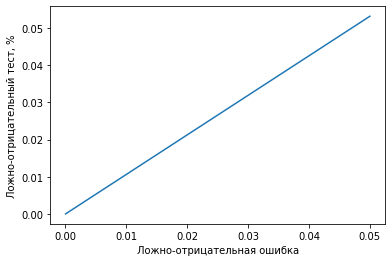

In [66]:
plt.plot(p_false_negative, y)
plt.ylabel("Ложно-отрицательный тест, %")
plt.xlabel("Ложно-отрицательная ошибка")
plt.show()

Вывод: Уменьшение ложно-положительной ошибки значительно увеличивает точность теста в то время, как уменьшение ложно-отрицательной ошибки линейно уменьшает вероятность ложно-отрицательного теста (и так небольшую), причем линейно.
Посоветовать уменьшать ложно-положительную ошибку.